<h1> LA Crime Analysis (2020 - Present)</h1>

**Analysis Period:** January 1, 2020, to September 16, 2024.

**Purpose of this Analysis:**
- Understand crime trends in Los Angeles.
- Examine how crime rates have changed over time.
- Identify areas most affected by crime.
- Provide insights for stakeholders (law enforcement, policymakers) to support informed decision-making aimed at reducing crime rates and enhancing public safety.


<h2 style="color: blue;">Data Collecting</h2> 

 **Link to the data used and its publisher can be found here** <br>
Data link-
https://catalog.data.gov/dataset/crime-data-from-2020-to-present <br>
Publisher link-
https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data  

### **Data Dictionary**

*Dictionary describes column name (column names are police report data)*
1. **DR_NO:** Division of Records Number: Made up of 2 digit year, Area Id, and 5 digits <br>
2. **Date Rptd:** Date Incidint was reported <br>
3. **DATE OCC:** Date of occurance.<br> 
4. **TIME OCC:** Time of occurance, 24 Hour military time <br>
5. **AREA:** LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.<br>
6. **AREA NAME:** The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. <br>
7. **Rpt Dist No:** A four-digit code that represents a sub-area within a Geographic Area <br>
8. **Part 1-2:** 1 means normal responce (code 1, no lights or sirens), 2 means urget (code 2, immediate risk of injury to person,or property)<br>
9. **Crm Cd:** Indicates the crime committed <br>
10. **Crm Cd Desc:** Defines the crime comitted <br>
11. **Mocodes:** Modus Operandi: Activities associated with the suspect in commission of the crime. <br>
12. **Vict Age:** the victims age <br>
13. **Vict Sex:** the sex of the victim <br>
14. **Vict Descent:** Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian <br>
15. **Premis Cd:** The type of structure, vehicle, or location where the crime took place. <br>
16. **Premis Desc:** Defines the premis code provided<br>
17. **Weapon Used Cd:** The type of weapon used in the crime. <br>
18. **Weapon Desc:** Defines the Weapon Used Code provided.<br>
19. **Status:** Status of the case. (IC is the default)<br>
20. **Status Desc:** Defines the Status Code provided.<br>
21. **Crm Cd 1:** Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. <br>
22. **Crm Cd 2:** May contain a code for an additional crime, less serious than Crime Code 1.<br>
23. **Crm Cd 3:** May contain a code for an additional crime, less serious than Crime Code 1.<br>
24. **Crm Cd 4:** May contain a code for an additional crime, less serious than Crime Code 1.<br>
25. **LOCATION:** Street address of crime incident rounded to the nearest hundred block to maintain anonymity.<br>
26. **Cross Street:** Street address of crime incident rounded to the nearest hundred block to maintain anonymity.<br>
27. **LAT:** Latitude<br>
28. **LON:** Longitude<br>

In [159]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


<h2 style="color: blue;">Data Cleaning</h2>

### **Checking for Duplicate Rows**

No duplicate rows found

In [344]:
df.duplicated().sum()

0

### **Identifying Incorrect Values**

Incorrect values for **Victim Sex** and **Victim Age** were identified using `.value_counts()`. To address this issue, the functions **gender_check(x)** and **age_check(x)** outlined below will return empty values for any incorrect inputs.


#### Vict Sex Incorrect Values

In addition to **female** and **male**, there are entries for **X**, **H**, and **-** in the **Vict Sex** field. The reasons for these distinctions are unclear. Therefore, this analysis will focus solely on comparing **female** and **male** victims.


In [160]:
df['Vict Sex'].value_counts()

M    395620
F    351884
X     93814
H       111
-         1
Name: Vict Sex, dtype: int64

In [161]:
def gender_check(x):
    if x not in ['M', 'F']:
        return np.nan
    return x
df['Vict Sex']= df['Vict Sex'].apply(gender_check)
df['Vict Sex'].value_counts()

M    395620
F    351884
Name: Vict Sex, dtype: int64

#### Vict Age Incorrect Values

It appears that **0** was mistakenly entered in the **Vict Age** field instead of leaving it blank. There were no victims aged **1**, and negative ages are nonsensical. Consequently, all these invalid inputs have been converted into empty cells. The age **2** value appears to be correct based on its associated crime description.


In [320]:
df['Vict Age'].value_counts().reset_index(name = 'count').sort_values(by = 'index').head(6)

,index,count
102,-4,3
101,-3,5
100,-2,29
96,-1,96
0,0,257559
85,2,428


In [328]:
def age_check(x):
    if x<2:
        return np.nan
    return x
df['Vict Age'] = df['Vict Age'].apply(age_check)

In [102]:
df.isna().sum()

DR_NO                     0
Date Rptd                 0
DATE OCC                  0
TIME OCC                  0
AREA                      0
AREA NAME                 0
Rpt Dist No               0
Part 1-2                  0
Crm Cd                    0
Crm Cd Desc               0
Mocodes              143980
Vict Age                  0
Vict Sex             231124
victim ethnicity     137211
Premis Cd                15
Premis Desc             585
Weapon Used Cd       652669
Weapon Desc          652669
Status                    0
Status Desc               0
Crm Cd 1                 11
Crm Cd 2             909812
Crm Cd 3             976319
Crm Cd 4             978564
Address                   0
Cross Street         827201
LAT                       0
LON                       0
Report Delay              0
Year                      0
Month                     0
Report Delay Days         0
dtype: int64

### **Fixing Empty Cells**

In one instance, the **Status** column was empty while the **Status Description** was marked as **"UNK."** Since this was the only case with an unknown status description, I updated the empty **Status** cell to **"CC"** for consistency.


In [162]:
#Shows empty value for Status

#df[df['Status'] == 'CC']
df[df['Status Desc'] == 'UNK']

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
487766,220125552,12/01/2022 12:00:00 AM,11/16/2022 12:00:00 AM,1615,1,Central,135,2,814,CHILD PORNOGRAPHY,...,CC,UNK,814.0,NaN,NaN,NaN,300 S MAIN ST,NaN,34.0495,-118.2459
606882,220126119,12/10/2022 12:00:00 AM,12/10/2022 12:00:00 AM,1515,1,Central,119,1,350,"THEFT, PERSON",...,CC,UNK,350.0,NaN,NaN,NaN,800 N ALAMEDA ST,NaN,34.0561,-118.2375
725048,231311708,06/02/2023 12:00:00 AM,06/02/2023 12:00:00 AM,1340,13,Newton,1341,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,CC,UNK,440.0,624.0,NaN,NaN,36TH ST,MAIN ST,34.0170,-118.2742
817415,230708724,04/22/2023 12:00:00 AM,04/21/2023 12:00:00 AM,1200,7,Wilshire,787,1,510,VEHICLE - STOLEN,...,CC,UNK,510.0,NaN,NaN,NaN,2200 WELLINGTON RD,NaN,34.0364,-118.3357
849418,230915357,10/16/2023 12:00:00 AM,10/11/2023 12:00:00 AM,1800,9,Van Nuys,946,2,664,"BUNCO, PETTY THEFT",...,CC,UNK,664.0,NaN,NaN,NaN,13800 OXNARD ST,NaN,34.1794,-118.4334
876861,241810568,06/08/2024 12:00:00 AM,05/24/2024 12:00:00 AM,1900,18,Southeast,1871,1,510,VEHICLE - STOLEN,...,NaN,UNK,510.0,NaN,NaN,NaN,13500 S FIGUEROA ST,NaN,33.9092,-118.2827
922108,240206384,01/24/2024 12:00:00 AM,01/23/2024 12:00:00 AM,2100,2,Rampart,249,1,330,BURGLARY FROM VEHICLE,...,CC,UNK,330.0,NaN,NaN,NaN,600 LUCAS AV,NaN,34.0548,-118.2638


In [163]:
#Changes missing value in 'Status' to 'CC'

df.loc[df['Status'].isnull(),'Status'] = 'CC'

### **Standardizing Format**

Converting the **'Date Rptd'** (Date crime was reported) and **'DATE OCC'** (Date crime occurred) columns from an object type to datetime format. This standardization will facilitate date-based analyses and improve the handling of date-related operations.


In [8]:
#df.dtypes

In [164]:
#gets just the date from column
df['DATE OCC'] = df['DATE OCC'].apply(lambda x: x[0:10])
df['Date Rptd'] = df['Date Rptd'].apply(lambda x: x[0:10])

In [165]:
#turns [Date occ] into datetime format YYY-MM-DD
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [166]:
#turns [Date Rptd] into datetime format YYY-MM-DD
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

In [167]:
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


### **Improving Readability**

To enhance the clarity of the DataFrame, we will implement the following changes:

- Rename the `'Vict Desc'` column to its actual name using mapping.
- Change the column name from `'LOCATION'` to `'Address'`.
- Rename the column `'Vict descent'` to `'Victim Ethnicity'`.

These adjustments will improve readability and facilitate analysis.


In [168]:
#turn df['Vict Descent'] into ethnicity
Ethnicity_mapping = {'A':'Other Asian', 'B': 'Black', 'C': 'Chinese','D':'Cambodian', 'F':'Filipino',
                     'G':'Guamanian','H':'Hispanic','I':'American Indian','J':'Japanese','K':'Korean',
                     'L':'Loation','O':'Other','P': 'Pacific Islander','S':'Samoan','U':'Hawaiian',
                     'V':'Vietnamese','W':'White','X':'Unkown','Z':'Asian Indian'}
df['Vict Descent'] = df['Vict Descent'].map(Ethnicity_mapping)

In [169]:
#Renaming columns
df.rename(columns = {'LOCATION':'Address','Vict Descent': 'victim ethnicity'},inplace = True)

### **Fixing Spacing Issues**

To enhance the consistency and readability of the **Address** column (previously labeled as **LOCATION**), I removed extra spaces within the text. Utilizing Python's `re` package, I replaced multiple spaces with a single space and stripped any leading or trailing spaces. This cleanup ensures a more uniform presentation of address data.


In [170]:
df['Address'].head(3)

0    1900 S  LONGWOOD                     AV
1    1000 S  FLOWER                       ST
2    1400 W  37TH                         ST
Name: Address, dtype: object

In [171]:
import re
def replace_multiple_spaces(location):
    return re.sub(r'\s+', ' ', location.strip())
df['Address'] = df['Address'].apply(replace_multiple_spaces)

In [172]:
df['Address'].head(3)

0    1900 S LONGWOOD AV
1      1000 S FLOWER ST
2        1400 W 37TH ST
Name: Address, dtype: object

### **Identifying Outliers**

Since 2024 is an incomplete year, any yearly or monthly comparisons across the four-year period may be skewed, as the data for 2024 does not represent a full year.

In [174]:
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df.groupby('Year').size().reset_index(name = 'Crime reported')

,Year,Crime reported
0,2020,199776
1,2021,209791
2,2022,235136
3,2023,232093
4,2024,101832


<h2 style="color: blue;">Data Transformation</h2>

### **Adding Columns**

The Report Delay column was added to explore potential insights into the speed at which cases are reported. This raises further questions about factors or trends that might influence whether and how quickly a case is reported.

In [175]:
df['Report Delay'] = df['Date Rptd'] - df['DATE OCC']

### **Grouping Crimes**

The 'Crm Cd Desc' column shows the crime associated with each case. Since many of the crime descriptions share similarities, grouping them could provide valuable insights into the most prevalent types of crime.<br> **This was done in Tableau Visualization**

<h2 style="color: blue;">Visualizations</h2>

### **Questions to Answer**

- What does the distribution of crime look like per year and month?  
  (Which months have the highest crime rates? Which year had the highest crime rate?)

- What were the most common crimes in the month and year that recorded the highest crime rates?
- Which ethnicities had the highest number of victims?  

- What is the most common crime committed against victims under 18 years of age? Under 10 years of age?  

- What are the most frequently used weapons in crimes?  

- Which area has had the highest reported crime rate since 2020?  

- Which area has a higher number of female versus male crime victims?  

- Are there any crimes with a significant reporting delay?


# Comparison Between Years (2020-2023)

The next three graphs will focus on the years **2020 to 2023** to compare complete years and identify trends, as these years contain a full set of data. Comparisons with 2024 cannot be made at this time, as the year is still incomplete.


## Crime Rate Visualization

**Key Findings:**  
The crime rate remained relatively stable from 2020 to 2021, followed by a slight increase in 2022. This was then followed by a minor decrease in 2023.

Text(0, 0.5, 'Crime amount')

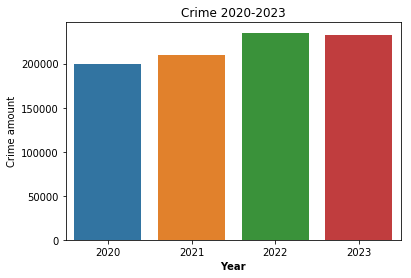

In [241]:
# get df with just specific years
years_upto_2023 = df[df['Year'].isin([2020,2021,2022,2023])]
sns.countplot(years_upto_2023['Year'])
plt.title('Crime 2020-2023')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Crime amount')

## **Crime Trends Overview**

### **Left Graph: Total Crime by Year**

This line graph illustrates the total number of reported crimes for each year from 2020 to 2023. Key insights include:
- **Rising Trend**: There is a noticeable upward trend in crime over the years, with a significant increase starting in 2021.
- **Peak in 2022**: The highest crime rate is observed in 2022, followed by a slight decline in 2023.

This overall pattern indicates an increase in crime rates over time, culminating in a peak in 2022.

### **Right Graph: Crime by Month**

The bar chart depicts monthly crime counts for the period from 2020 to 2023. Key insights include:
- **Seasonal Variation**: Crime rates fluctuate significantly by month, revealing distinct seasonal patterns.
- **Highest Crime Months**: The months with the highest crime rates are **July**, **August**, and **October**.
- **Lowest Crime Month**: February consistently shows the lowest crime counts, suggesting a potential seasonal dip in crime. 

Additionally, December, January, May, June, and July display similar crime rates.

The monthly trend indicates that crime rates tend to rise during the summer and early fall, peaking in October, while winter months, especially February, experience a decline in incidents.


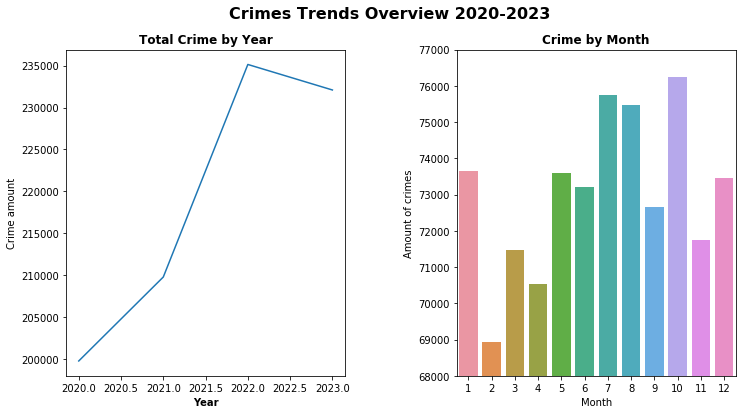

In [187]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first line plot
crime_upto_2023 = years_upto_2023.groupby('Year').size().reset_index(name='Crime amount')
sns.lineplot(x = crime_upto_2023['Year'], y = crime_upto_2023['Crime amount'], ax = axes[0])
axes[0].set_title('Total Crime by Year',fontweight = 'bold')
axes[0].set_xlabel('Year',fontweight='bold')
axes[0].set_ylabel('Crime amount')

# Create the count plot

sns.countplot(years_upto_2023['Month'],ax = axes[1])

# Set the starting value for the y-axis
axes[1].set_ylim(68000, 77000)  # Set the minimum value to 1

# Customize the plot
axes[1].set_title('Crime by Month',fontweight = 'bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Amount of crimes')

# Add overall title
plt.suptitle('Crimes Trends Overview 2020-2023', fontsize=16,fontweight='bold')

# increase space between plots
plt.subplots_adjust(wspace=0.4) 
plt.show()

# **Visualization of Monthly Crime Rates for Each Year (2020-2023)**

This line graph illustrates monthly crime trends across four years (2020 to 2023), with each line representing a different year. This allows for easy comparison of seasonal crime patterns. Similar trends found as the **Right Graph: Crime by Month** from above:

- **January to February Drop**: All years show a decrease in crime between January and February, indicating a common seasonal dip during this period.
- **Mid-Year Increase**: Between June and July, there is a slight uptick in crime across most years, suggesting a recurring mid-year rise.
- **Late-Year Peaks and Drops**: Crime rates tend to drop in September, followed by a sharp increase in October across multiple years. This peak is then typically followed by another decline in November.

These patterns suggest consistent seasonal variations in crime rates, with distinct drops at the beginning and end of the year and an increase in mid-summer and early fall. The month of October consistently shows the most significant increase in crime, followed by a drop in November, which may reflect annual factors affecting crime rates during this period.


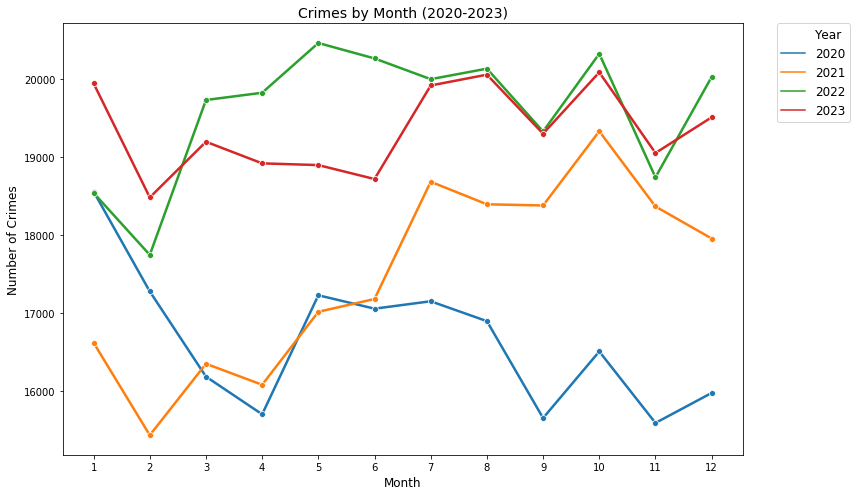

In [99]:
crime2020 = df[df['DATE OCC'].dt.year == 2020] #gets dataframe for each specific year
monthly_crime_2020 = crime2020.groupby('Month').size().reset_index(name='monthly_count')
monthly_crime_2020['Year'] = 2020  # Add a year column for 2020

crime2021 = df[df['DATE OCC'].dt.year == 2021]
monthly_crime_2021 = crime2021.groupby('Month').size().reset_index(name='monthly_count')
monthly_crime_2021['Year'] = 2021  # Add a year column for 2021

crime2022 = df[df['DATE OCC'].dt.year == 2022]
monthly_crime_2022 = crime2022.groupby('Month').size().reset_index(name='monthly_count')
monthly_crime_2022['Year'] = 2022  # Add a year column for 2022

crime2023 = df[df['DATE OCC'].dt.year == 2023]
monthly_crime_2023 = crime2023.groupby('Month').size().reset_index(name='monthly_count')
monthly_crime_2023['Year'] = 2023  # Add a year column for 2023

# Concatenate the two DataFrames
monthly_crime = pd.concat([monthly_crime_2020, monthly_crime_2021,monthly_crime_2022,monthly_crime_2023])

# Define a color palette with contrasting colors
palette = sns.color_palette("tab10", n_colors=4)

# Plot the data
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_crime,
    x='Month',
    y='monthly_count',
    hue='Year',
    marker="o",
    palette=palette,
    linewidth=2.5  # Keep lines thick for visibility
)

# Remove the default legend and add a custom one
plt.legend(
    loc='upper left',           # Position the legend at the top center
    bbox_to_anchor=(1.05, 1),   # Adjust position slightly above the plot
    borderaxespad=0,
    title_fontsize='13',           # Increase font size of the title
    prop={'size': 12},)             # Increase font size of legend labels
                        

# Add labels and title
plt.title('Crimes by Month (2020-2023)', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Rotate x-ticks if necessary for better readability
plt.xticks(monthly_crime_2020['Month'])

# Show plot with layout adjustments
plt.tight_layout()
plt.show()


# **Top Types of Crime (2020-2023)**

**Using the information from the graphs above**, October is identified as the month with the highest crime rates, while 2020 is noted as the year with the highest overall crime rates.

### **Key Findings:**

- **Highest Crime Month: October**
  - The top 5 crimes recorded are:
    1. Vehicle Theft
    2. Simple Assault (Battery)
    3. Burglary from Vehicle
    4. Identity Theft
    5. Vandalism

- **Highest Crime Year: 2020**
  - The top 5 crimes recorded are:
    1. Vehicle Theft
    2. Identity Theft
    3. Simple Assault (Battery)
    4. Burglary from Vehicle
    5. Burglary

Overall, vehicle theft remains the most common crime across both the month of October and the year 2020.


**Top 5 crimes in October (the highest crime month)**

In [21]:
years_upto_20203[years_upto_20203['Month'] == 10]['Crm Cd Desc'].value_counts().head()

VEHICLE - STOLEN                                           8492
BATTERY - SIMPLE ASSAULT                                   6199
BURGLARY FROM VEHICLE                                      4744
THEFT OF IDENTITY                                          4640
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    4566
Name: Crm Cd Desc, dtype: int64

**Top 5 crimes in the year 2022 (The highest crime year)**

In [22]:
years_upto_20203[years_upto_20203['Year'] == 2022]['Crm Cd Desc'].value_counts().head()

VEHICLE - STOLEN            24741
THEFT OF IDENTITY           22123
BATTERY - SIMPLE ASSAULT    18058
BURGLARY FROM VEHICLE       14231
BURGLARY                    14069
Name: Crm Cd Desc, dtype: int64

### This next analysis will focus on the years 2020 to the present. Rather than comparing data year by year, we will be identifying trends across the overall dataset.


## **Victims by Ethnicity (2020-Present)** 
*(Only displaying victims with 1,000 or more cases)*

### **Key Findings:**
- Hispanics constitute the largest group of victims in all reported crimes since 2020.
- Other ethnicities follow, with Asian victims representing the lowest numbers.
- The high number of Hispanic victims reflects demographic trends, as they represent the largest population group in Los Angeles.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

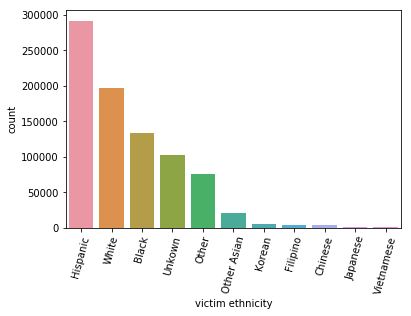

In [238]:
#this shows only ethnicities with victims number being over 1000
ethnicity_count = df['victim ethnicity'].value_counts()
filtered_ethnicity = ethnicity_count[df['victim ethnicity'].value_counts() > 1000].index

#gets dataframe with just these ethnicities
new_filter = df[df['victim ethnicity'].isin(filtered_ethnicity)]

sns.countplot(new_filter['victim ethnicity'],order = new_filter['victim ethnicity'].value_counts().index)
plt.xticks(rotation = 75)

## **Most Common Types of Crime for Victims Aged 18 and Under**


### **Key Findings:**
The top three crimes affecting this age group are:
- **Battery (Simple Assault):** This is the most prevalent crime, with an average victim age of 15.
- **Child Abuse:** This crime follows, with an average victim age of 11.
- **Assault with a Deadly Weapon:** This crime also has an average victim age of 15.


In [330]:
#all victims 18 and under
Young_victims = df[(df['Vict Age'] <= 18)]

#This gets me the top 10 highest crimes and the amount of crimes
crime_description = Young_victims.groupby('Crm Cd Desc').size().reset_index(name = 'Amount of crimes')
#This sorts from highest amount to lowest, also gets only the top 10
highest_amount = crime_description.sort_values(by='Amount of crimes', ascending=False).head(10)
# highest_amount
#just shows all Young_victims with top 10 crimes 
top_crimes_young = Young_victims[Young_victims['Crm Cd Desc'].isin(highest_amount['Crm Cd Desc'])]
#gets average age for each top 10 crime
age_victim = top_crimes_young.groupby('Crm Cd Desc')['Vict Age'].mean().round(0).reset_index(name = 'Average age of victims' )
# age_victim

#combine both into one dataframe 
combined = pd.merge(age_victim, highest_amount, on='Crm Cd Desc', how='inner') 

sort_combined = combined.sort_values(by = 'Amount of crimes', ascending = False)
sort_combined

,Crm Cd Desc,Average age of victims,Amount of crimes
1,BATTERY - SIMPLE ASSAULT,15.0,4910
2,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,11.0,3403
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",15.0,3104
8,ROBBERY,16.0,1838
6,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,10.0,1696
9,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",15.0,1007
3,CHILD ANNOYING (17YRS & UNDER),13.0,1002
7,INTIMATE PARTNER - SIMPLE ASSAULT,17.0,983
5,CRIMINAL THREATS - NO WEAPON DISPLAYED,14.0,974
4,CHILD NEGLECT (SEE 300 W.I.C.),8.0,941


## **Most Common Types of Crime for Victims Aged 10 and Under**

Due to differences in the types of crimes that affect younger children and teenagers, the following are the top three crimes impacting children aged 10 and under:

### **Key Findings:**
The top three crimes affecting this age group are:
- **Child Abuse:** The average victim age is 7.
- **Crimes Against Children (Ages 13 and Under):** The average victim age is 10.
- **Child Neglect:** The average victim age is 5.


In [332]:
#all victims 5 and under
Young_victims = df[(df['Vict Age'] <= 10)]

#This gets me the top 10 highest crimes and the amount of crimes
crime_description = Young_victims.groupby('Crm Cd Desc').size().reset_index(name = 'Amount of crimes')
#This sorts from highest amount to lowest, also gets only the top 10
highest_amount = crime_description.sort_values(by='Amount of crimes', ascending=False).head(10)

#just shows all Young_victims with top 10 crimes 
top_crimes_young = Young_victims[Young_victims['Crm Cd Desc'].isin(highest_amount['Crm Cd Desc'])]
#gets average age for each top 10 crime
age_victim = top_crimes_young.groupby('Crm Cd Desc')['Vict Age'].mean().round(0).reset_index(name = 'Average age of victims' )

#combine both into one dataframe 
combined = pd.merge(age_victim, highest_amount, on='Crm Cd Desc', how='inner') 
sort_combined = combined.sort_values(by = 'Amount of crimes', ascending = False)
sort_combined

,Crm Cd Desc,Average age of victims,Amount of crimes
3,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,7.0,1364
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7.0,772
5,CHILD NEGLECT (SEE 300 W.I.C.),5.0,672
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",6.0,340
1,BATTERY - SIMPLE ASSAULT,7.0,336
4,CHILD ANNOYING (17YRS & UNDER),8.0,177
2,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,7.0,172
8,SEXUAL PENETRATION W/FOREIGN OBJECT,6.0,158
6,CRIMINAL THREATS - NO WEAPON DISPLAYED,6.0,99
9,VIOLATION OF RESTRAINING ORDER,6.0,84


## **Top 10 Most Used Weapons**

The following are the most commonly used weapons in reported cases:

1. **Strong-Arm (Hands, Fists, Feet, or Bodily Force):** 174,349 cases
2. **Unknown Weapon:** 35,869 cases
3. **Verbal Threat:** 23,793 cases
4. **Handgun:** 20,093 cases


In [37]:
df['Weapon Desc'].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174349
UNKNOWN WEAPON/OTHER WEAPON                        35869
VERBAL THREAT                                      23793
HAND GUN                                           20093
SEMI-AUTOMATIC PISTOL                               7240
KNIFE WITH BLADE 6INCHES OR LESS                    6822
UNKNOWN FIREARM                                     6566
OTHER KNIFE                                         5867
MACE/PEPPER SPRAY                                   3728
VEHICLE                                             3240
Name: Weapon Desc, dtype: int64

## **Areas with the Highest Crime Rates**

The top five areas with the highest reported crime rates are **Central**, **77th Street**, **Pacific**, **Southwest**, and **Hollywood**. In comparison, **Foothill** has the lowest reported crime rate among all areas.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

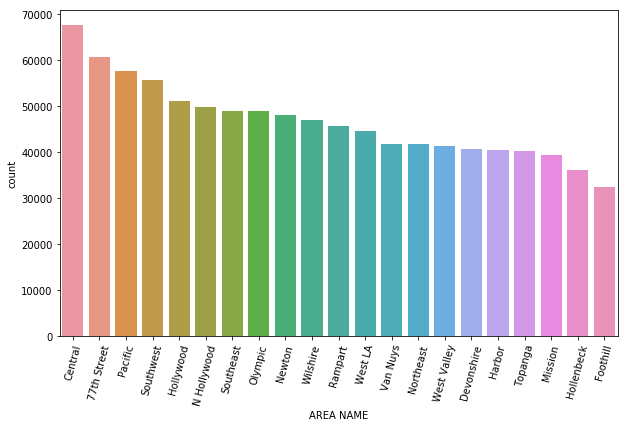

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(df['AREA NAME'],order = df['AREA NAME'].value_counts().index)
plt.xticks(rotation = 75)

## **Gender Distribution of Crime Victims by Area**

This analysis explores the distribution of male and female crime victims across various areas. Key findings are highlighted below:

- **Areas with More Female Victims**:  
   Four areas—**77th Street, Harbor, Southeast, and Southwest**—report a higher number of female victims than male victims.

- **Areas with Close Gender Ratios**:  
   In **Devonshire, Foothill, Harbor, Hollenbeck, Mission, Northeast, Olympic, and Rampart**, the number of male and female victims is quite similar.

- **77th Street**:  
   This area, which reports one of the highest crime rates from graph above **(Areas with the Highest Crime Rates)**, shows a majority of female victims.

- **Central Area**:  
   Here, male victims outnumber female victims by the largest margin among all areas.

- **General Trend**:  
   Across most areas, male victims generally outnumber female victims by a substantial amount.

This visualization provides insight into gender dynamics among crime victims, highlighting areas where gender disparities are most pronounced.


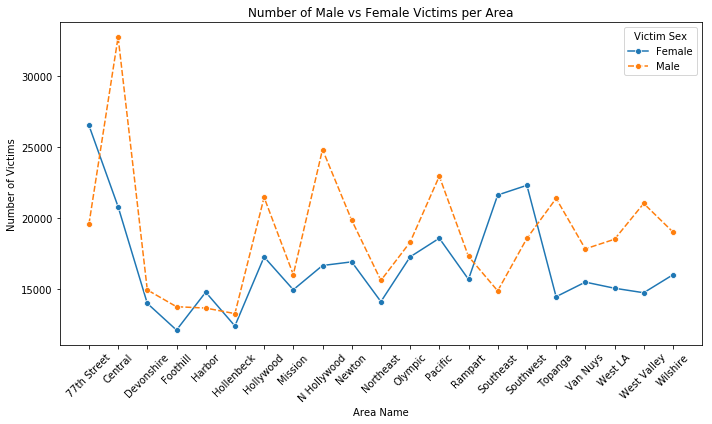

In [122]:
# Count the number of male and female victims per area

#creates dataframe with Area Name as index
victim_counts = df.groupby(['AREA NAME', 'Vict Sex']).size().unstack(fill_value=0) 

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=victim_counts, marker='o')

plt.title('Number of Male vs Female Victims per Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.legend(title='Victim Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

## **Highest Report Delay per Crime**

Several interesting findings emerge regarding the report delays for different types of crimes:

- The crime category with the highest report delay is **crimes against children aged 13 and under**, averaging a delay of **148 days**.
- Among the top 10 crimes with the longest report delays, **5 are sexual offenses**, **2 are crimes against children**, and **3 are theft-related crimes**.


In [340]:
df['Report Delay (Days)'] = df['Report Delay'].dt.days
Average_Delay = df.groupby('Crm Cd Desc')['Report Delay (Days)'].mean().reset_index()
Average_Delay.sort_values(by = 'Report Delay (Days)', ascending = False).head(10)

,Crm Cd Desc,Report Delay (Days)
39,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,148.030981
101,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,125.278586
102,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",119.086223
46,DISHONEST EMPLOYEE ATTEMPTED THEFT,105.500000
79,LEWD/LASCIVIOUS ACTS WITH CHILD,104.229885
9,BIGAMY,99.428571
103,SEXUAL PENETRATION W/FOREIGN OBJECT,78.299924
83,ORAL COPULATION,76.058414
65,GRAND THEFT / AUTO REPAIR,66.000000
116,THEFT OF IDENTITY,65.376075


#### **Average Report Delay in victims 18 and under**


In [341]:
print('Average crime report delay for minors are:', df[df['Vict Age'] <= 18]['Report Delay'].mean())

Average crime report delay for minors are: 36 days 04:11:08.645284


#### **Average Report Delay in Adults**


In [342]:
print('Average crime report delay for adults is:', df[df['Vict Age'] > 18]['Report Delay'].mean())

Average crime report delay for adults is: 12 days 09:19:15.751804


## Conclusion

This analysis of LAPD crime records from January 1, 2020, to September 16, 2024, offers critical insights into crime trends in Los Angeles. The findings aim to support stakeholders in making data-driven decisions to enhance public safety.

### Key Findings

- **Crime Trends**: Overall crime rates show a notable increase, peaking in 2022, with the highest incidents occurring in **July**, **August**, and **October**. **February** consistently records the lowest crime counts, indicating seasonal variations.

- **Common Crimes**: The predominant crime in the peak month of October and the highest crime year (2020) is **Vehicle Theft**, followed by **Simple Assault (Battery)** and **Burglary from Vehicle**.

- **Victim Demographics**: Hispanics constitute the largest group of crime victims since 2020, reflecting their significant population in Los Angeles.

- **Crimes Against Minors**: The most common offenses against victims under 18 include **Battery**, **Child Abuse**, and **Assault with a Deadly Weapon**.

- **Weapons Used**: The most frequently used weapons in reported crimes are **Strong-Arm**, **Unknown Weapon**, and **Handgun**.

- **Areas of Concern**: The neighborhoods with the highest crime rates are **Central**, **77th Street**, **Pacific**, and **Hollywood**, while **Foothill** has the lowest.

- **Victim Gender Distribution**: Areas like **77th Street** and **Harbor** report higher female victimization, but **Central** shows a significant male victim majority.

- **Reporting Delays**: Crimes against children aged 13 and under experience an average reporting delay of **148 days**.

This analysis highlights key crime trends and demographics, providing essential data to inform public safety strategies.


### Tableau Visualizations can be found here
https://public.tableau.com/views/LACrime2020-2024/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

### Making a copy and removing unwanted columns to export as csv

In [912]:
df_filtered = df.copy()

In [913]:
df_filtered.drop(['DR_NO','Mocodes','Status', 'Status Desc','Cross Street','Report Delay (Days)'], axis = 1, inplace = True)

In [917]:
df_filtered.to_csv('cleaned_Crime_Data_from_2020_to_Present.csv', index=False)